In [1]:
import pandas as pd
import numpy as np

cereals = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/cereal.csv')
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [2]:
## let's drop missing vals
cereals = cereals.dropna()

In [3]:
## only use numeric variables
## you can also use dummy-encoded variables

from sklearn.decomposition import PCA

pcanalysis = PCA()

PCs = pcanalysis.fit_transform(cereals.drop(['name', 'mfr', 'type'], axis = 1))
pcanalysis.explained_variance_ratio_


array([5.43806183e-01, 3.84958465e-01, 3.78465419e-02, 2.68964608e-02,
       5.62741557e-03, 4.26558066e-04, 3.28530205e-04, 4.90346765e-05,
       3.64954646e-05, 2.14067381e-05, 2.57089620e-06, 3.37598758e-07,
       2.09063483e-19])

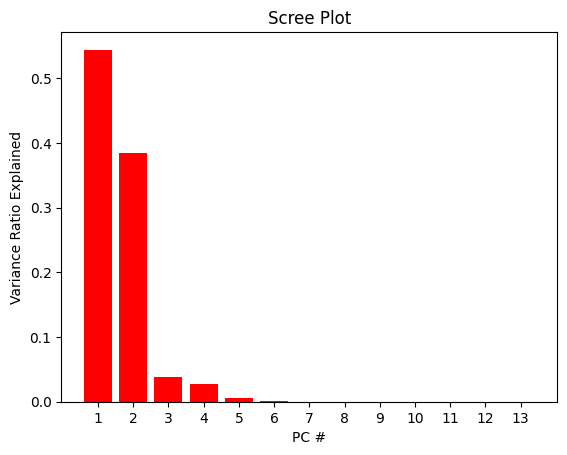

In [6]:
## scree plot
import matplotlib.pyplot as plt

features = np.array(range(pcanalysis.n_components_))+1
plt.bar(features, pcanalysis.explained_variance_ratio_, color = 'red')
plt.title("Scree Plot")
plt.xlabel('PC #')
plt.ylabel('Variance Ratio Explained')
plt.xticks(features)
plt.show()

In [7]:
import plotly.express as px

cereals.reset_index(inplace = True) # to avoid different indices
PCdf = pd.concat([cereals['name'], pd.DataFrame(PCs[:,0:2], columns = ['PC1', 'PC2'])], axis = 1)

fig = px.scatter(PCdf, x="PC1", y="PC2", text="name", log_x=False, size_max=100, color="name")
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Cereal Brands and Principal Components', title_x=0.5)
fig.show()